In [252]:
import pandas as pd
import numpy as np

In [253]:
rate_of_change_source = 'rateofchange_exp_3.csv'

In [254]:
data = pd.read_csv(rate_of_change_source)

In [255]:
data

,location,nc_ma_pm_0,nc_ma_pm_1,nc_ma_pm_2,nc_ma_pm_3,nc_ma_pm_4,nc_ma_pm_5,nc_ma_pm_6,nc_ma_0,nc_ma_1,nc_ma_2,nc_ma_3,nc_ma_4,nc_ma_5,nc_ma_6,has_peaked,notuseable
0,Afghanistan,0.083844,0.085671,0.055939,-0.027877,0.052194,-0.031627,0.477489,0.277896,0.089544,0.046708,0.018776,0.031833,0.011366,0.019037,1,False
1,Albania,-0.039494,0.150674,-0.154790,-0.084516,-0.138455,-0.071436,0.076932,-0.028777,-0.007407,-0.097015,-0.066116,-0.026549,-0.009091,0.100917,0,False
2,Algeria,0.119303,0.065027,0.028005,0.011657,0.051028,0.035700,0.051297,0.021969,0.003185,0.000000,0.002381,0.026128,0.010802,0.000000,1,False
3,Argentina,-0.038949,0.070351,0.163489,0.133358,0.119249,0.203776,-0.003270,0.063505,0.047928,-0.144142,0.230399,0.033464,0.023596,0.044085,0,False
4,Armenia,-0.045308,0.038415,0.018499,0.042736,0.039958,0.091627,0.046029,0.046140,0.031004,0.060144,0.042749,0.052874,-0.044760,-0.001524,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,United Kingdom,0.168219,0.106045,0.070942,0.050329,0.139843,0.041827,0.021211,0.168219,0.106042,0.070943,0.050328,0.139840,0.041826,0.021210,1,False
140,United States,0.151138,0.101115,0.096078,0.137156,0.097778,0.081490,0.086055,0.151137,0.101115,0.096078,0.137158,0.097777,0.081490,0.086055,1,False
141,Uzbekistan,-0.029855,0.180124,-0.082331,-0.045921,0.240808,-0.036934,-0.023062,-0.029885,0.180095,-0.082329,-0.045952,0.240826,-0.036969,-0.023033,0,False
142,Venezuela,-0.036229,-0.173508,-0.088749,0.057004,-0.044920,0.211748,-0.244644,-0.036207,-0.173524,-0.088745,0.057007,-0.044944,0.211765,-0.244660,1,False


In [256]:
Location_Keys = 	['location']
NC_PM_Keys = ['nc_ma_pm_0','nc_ma_pm_1','nc_ma_pm_2','nc_ma_pm_3','nc_ma_pm_4','nc_ma_pm_5','nc_ma_pm_6']
NC_Keys = ['nc_ma_0','nc_ma_1','nc_ma_2','nc_ma_3','nc_ma_4','nc_ma_5','nc_ma_6']
Traget_Keys = ['has_peaked']

In [257]:
df_pm = data[NC_PM_Keys]

In [258]:
df_raw = data[NC_Keys]

In [259]:
train = np.stack([df_pm.values,df_raw.values],axis=2)

In [260]:
train_x = train

In [261]:
train_x[1,1,1]

-0.0074074069999999995

In [262]:
train_y = data[Traget_Keys].values

In [263]:
train_y.shape

(144, 1)

In [264]:
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from keras.optimizers import SGD, Adam
from keras.regularizers import l2
reg = 0.00001

sgd = SGD(lr=1e-6, decay=1e-4, momentum=0.9, nesterov=True)

In [265]:
model = Sequential()
model.add(LSTM(28, activation='relu', input_shape=(7, 2), kernel_regularizer=l2(reg), recurrent_regularizer=l2(reg), bias_regularizer=l2(reg)))
model.add(Dense(1, kernel_regularizer=l2(reg), bias_regularizer=l2(reg), activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_108"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_108 (LSTM)              (None, 28)                3472      
_________________________________________________________________
dense_108 (Dense)            (None, 1)                 29        
Total params: 3,501
Trainable params: 3,501
Non-trainable params: 0
_________________________________________________________________


In [266]:
np.argwhere(np.isnan(train_x))

array([], shape=(0, 3), dtype=int64)

In [267]:
train_x

array([[[ 0.08384364,  0.27789623],
        [ 0.08567091,  0.08954394],
        [ 0.05593893,  0.0467075 ],
        ...,
        [ 0.05219431,  0.03183341],
        [-0.03162676,  0.01136627],
        [ 0.47748893,  0.0190367 ]],

       [[-0.03949411, -0.02877698],
        [ 0.15067413, -0.00740741],
        [-0.15478964, -0.09701493],
        ...,
        [-0.13845473, -0.02654867],
        [-0.07143591, -0.00909091],
        [ 0.07693159,  0.10091743]],

       [[ 0.11930302,  0.02196908],
        [ 0.06502735,  0.00318471],
        [ 0.02800456,  0.        ],
        ...,
        [ 0.05102773,  0.02612827],
        [ 0.03569994,  0.01080247],
        [ 0.05129696,  0.        ]],

       ...,

       [[-0.02985534, -0.02988506],
        [ 0.18012373,  0.18009479],
        [-0.0823308 , -0.08232932],
        ...,
        [ 0.24080755,  0.24082569],
        [-0.03693393, -0.03696858],
        [-0.0230616 , -0.02303263]],

       [[-0.03622904, -0.0362069 ],
        [-0.17350832, -0.17

In [268]:
train_x[np.isnan(train_x)]=0

In [269]:
train_x

array([[[ 0.08384364,  0.27789623],
        [ 0.08567091,  0.08954394],
        [ 0.05593893,  0.0467075 ],
        ...,
        [ 0.05219431,  0.03183341],
        [-0.03162676,  0.01136627],
        [ 0.47748893,  0.0190367 ]],

       [[-0.03949411, -0.02877698],
        [ 0.15067413, -0.00740741],
        [-0.15478964, -0.09701493],
        ...,
        [-0.13845473, -0.02654867],
        [-0.07143591, -0.00909091],
        [ 0.07693159,  0.10091743]],

       [[ 0.11930302,  0.02196908],
        [ 0.06502735,  0.00318471],
        [ 0.02800456,  0.        ],
        ...,
        [ 0.05102773,  0.02612827],
        [ 0.03569994,  0.01080247],
        [ 0.05129696,  0.        ]],

       ...,

       [[-0.02985534, -0.02988506],
        [ 0.18012373,  0.18009479],
        [-0.0823308 , -0.08232932],
        ...,
        [ 0.24080755,  0.24082569],
        [-0.03693393, -0.03696858],
        [-0.0230616 , -0.02303263]],

       [[-0.03622904, -0.0362069 ],
        [-0.17350832, -0.17

In [270]:
# from sklearn.preprocessing import StandardScaler

# scalers = {}
# for i in range(X_train.shape[2]):
#     scalers[i] = StandardScaler()
#     X_train[:, :, i] = scalers[i].fit_transform(X_train[:, :, i]) 

In [271]:
history = model.fit(train_x,train_y,validation_split=0.2,epochs = 1000,verbose=True)

Train on 115 samples, validate on 29 samples
Epoch 1/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.7006 - accuracy: 0.3652 - val_loss: 226772271104.0000 - val_accuracy: 0.4138
Epoch 2/1000
115/115 [==============================] - 0s 214us/step - loss: 0.6980 - accuracy: 0.4435 - val_loss: 47791124480.0000 - val_accuracy: 0.5862
Epoch 3/1000
115/115 [==============================] - 0s 225us/step - loss: 0.6957 - accuracy: 0.5304 - val_loss: 48239071232.0000 - val_accuracy: 0.6897
Epoch 4/1000
115/115 [==============================] - 0s 197us/step - loss: 0.6932 - accuracy: 0.5565 - val_loss: 0.6396 - val_accuracy: 0.7586
Epoch 5/1000
115/115 [==============================] - 0s 198us/step - loss: 0.6910 - accuracy: 0.5913 - val_loss: 0.6368 - val_accuracy: 0.7586
Epoch 6/1000
115/115 [==============================] - 0s 197us/step - loss: 0.6891 - accuracy: 0.6000 - val_loss: 0.6337 - val_accuracy: 0.7586
Epoch 7/1000
115/115 [============================

In [272]:
predict_proba = model.predict_proba(train_x)
predict = predict_proba
predict_proba.T

array([[1.00000000e+00, 1.20848417e-02, 6.75059676e-01, 6.57255015e-08,
        9.70413327e-01, 1.00000000e+00, 1.00000000e+00, 1.87667608e-02,
        1.00000000e+00, 6.47397339e-02, 0.00000000e+00, 1.00000000e+00,
        9.83424306e-01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 2.71764398e-02, 1.00000000e+00, 2.42683291e-03,
        3.76939774e-04, 5.28982282e-03, 1.00000000e+00, 1.85573697e-02,
        1.00000000e+00, 2.43693590e-04, 1.03554517e-01, 5.44893146e-02,
        9.99982595e-01, 6.32119179e-03, 1.11390054e-02, 3.43617797e-02,
        6.18171692e-03, 1.00000000e+00, 9.99988317e-01, 9.98375654e-01,
        1.00000000e+00, 9.63418007e-01, 1.00000000e+00, 1.00000000e+00,
        7.56018126e-05, 9.99942720e-01, 4.16890383e-02, 6.19551539e-03,
        1.00000000e+00, 3.40737571e-08, 9.86385703e-01, 1.00000000e+00,
        1.00000000e+00, 9.96275485e-01, 9.70827699e-01, 1.00000000e+00,
        9.76476192e-01, 1.00000000e+00, 9.99999046e-01, 1.000000

In [273]:
predict[predict > 0.5] = 1
predict[predict <= 0.5] = 0
predict.T

array([[1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
        1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
        0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
        1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
        1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0.,
        1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0.,
        1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
        1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1.]],
      dtype=float32)

In [274]:
from sklearn.metrics import classification_report, confusion_matrix

In [275]:
y_pred = predict
print('Confusion Matrix')
print(confusion_matrix(train_y, y_pred))
print('Classification Report')
print(classification_report(train_y, y_pred))

Confusion Matrix
[[46  4]
 [10 84]]
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.92      0.87        50
           1       0.95      0.89      0.92        94

    accuracy                           0.90       144
   macro avg       0.89      0.91      0.90       144
weighted avg       0.91      0.90      0.90       144



In [276]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [277]:
import matplotlib.pyplot as plt

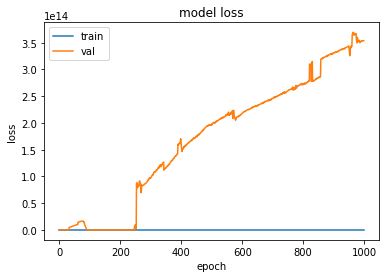

In [278]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

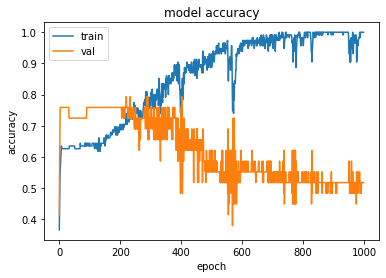

In [279]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [280]:
india_one_week_mat = [
                        [0.015834621,0.010025013,0.015868928,0.022212688,0.027071886,0.020451379,0.008974079],
                        [0.015848701,0.010033639,0.015862762,0.02220024,0.027068127,0.020445796,0.008969438],
                      ]

In [281]:
india_one_week_mat = np.array(india_one_week_mat)

In [282]:
india_one_week_mat = np.array([india_one_week_mat.T])

In [283]:
india_one_week_mat[0]

array([[0.01583462, 0.0158487 ],
       [0.01002501, 0.01003364],
       [0.01586893, 0.01586276],
       [0.02221269, 0.02220024],
       [0.02707189, 0.02706813],
       [0.02045138, 0.0204458 ],
       [0.00897408, 0.00896944]])

In [284]:
model.predict_proba(india_one_week_mat)

array([[0.08374736]], dtype=float32)

In [285]:
seed=0

In [286]:
def create_model():
  model = Sequential()
  model.add(LSTM(28, activation='relu', input_shape=(7, 2)))
  model.add(Dense(1, activation='sigmoid')) 
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [287]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold

In [288]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(train_x, train_y):
	model = create_model()
	model.fit(train_x[train], train_y[train], epochs=400, verbose=0)
	scores = model.evaluate(train_x[test], train_y[test], verbose=0)
	print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
	cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

accuracy: 62.07%
accuracy: 44.83%
accuracy: 62.07%
accuracy: 55.17%
accuracy: 50.00%
54.83% (+/- 6.76%)
